In [1]:
#Import packages
import numpy as np
import pandas as pd
import IPython as ip
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
ip.display.set_matplotlib_formats('svg')
from pandas.tools.plotting import table

In [2]:
import os

In [3]:
image_path = os.getcwd() + "\image"

In [4]:
#read the file
data = pd.read_excel("incomestatement.xlsx")

In [27]:
#head() shows the top five piece of data
data.head()

,公司,年/月,營業收入淨額,營業成本,營業毛利,營業費用,研究發展費,營業利益,其他收入,其他利益及損失,...,綜合損益歸屬母公司,綜合損益歸屬非控制權益,每股盈餘,加權平均股數,稀釋稅後淨利,每股盈餘－完全稀釋,加權平均股數－稀釋,稅前息前淨利,稅前息前折舊前淨利,常續性稅後淨利
28,1734 杏輝,2008/12,1810427,1133505,676922,613834,128034,63088,34405,-18806,...,-,-,0.43,106553,48481,0.43,112600,73350,193038,48776
25,1734 杏輝,2009/12,1813468,1089574,723894,588984,133477,134910,33957,-5085,...,-,-,1.16,113328,133726,1.09,122739,162364,293905,110496
22,1734 杏輝,2010/12,1822648,1128481,694167,596828,151962,97339,50574,-11058,...,-,-,0.88,126239,111276,0.87,127759,136855,282123,105804
19,1734 杏輝,2011/12,1840266,1146463,693803,631156,185198,62647,43380,-1879,...,-,-,0.55,132157,72229,0.54,132721,104148,266197,63925
16,1734 杏輝,2012/12,2086627,1312783,773844,647658,175707,126186,58427,-19070,...,100020,-23568,0.83,149325,124378,-,-,165543,328513,123299


In [6]:
data.columns

Index(['公司', '年/月', '營業收入淨額', '營業成本', '營業毛利', '營業費用', '  研究發展費', '營業利益',
       '其他收入', '其他利益及損失', '財務成本', '採權益法之關聯企業及合資損益之份額', '營業外收入及支出', '稅前淨利',
       '所得稅費用', '繼續營業單位損益', '合併總損益', '其他綜合損益－OCI', '本期綜合損益總額', '歸屬母公司淨利（損）',
       '歸屬非控制權益淨利（損）', '綜合損益歸屬母公司', '綜合損益歸屬非控制權益', '每股盈餘', '加權平均股數', '稀釋稅後淨利',
       '每股盈餘－完全稀釋', '加權平均股數－稀釋', '稅前息前淨利', '稅前息前折舊前淨利', '常續性稅後淨利'],
      dtype='object')

## 依公司、時間排序

In [7]:
data.sort_values(by= ['公司', '年/月'], ascending=True, inplace=True, na_position= 'first')

In [8]:
data.head()

,公司,年/月,營業收入淨額,營業成本,營業毛利,營業費用,研究發展費,營業利益,其他收入,其他利益及損失,...,綜合損益歸屬母公司,綜合損益歸屬非控制權益,每股盈餘,加權平均股數,稀釋稅後淨利,每股盈餘－完全稀釋,加權平均股數－稀釋,稅前息前淨利,稅前息前折舊前淨利,常續性稅後淨利
28,1734 杏輝,2008/12,1810427,1133505,676922,613834,128034,63088,34405,-18806,...,-,-,0.43,106553,48481,0.43,112600,73350,193038,48776
25,1734 杏輝,2009/12,1813468,1089574,723894,588984,133477,134910,33957,-5085,...,-,-,1.16,113328,133726,1.09,122739,162364,293905,110496
22,1734 杏輝,2010/12,1822648,1128481,694167,596828,151962,97339,50574,-11058,...,-,-,0.88,126239,111276,0.87,127759,136855,282123,105804
19,1734 杏輝,2011/12,1840266,1146463,693803,631156,185198,62647,43380,-1879,...,-,-,0.55,132157,72229,0.54,132721,104148,266197,63925
16,1734 杏輝,2012/12,2086627,1312783,773844,647658,175707,126186,58427,-19070,...,100020,-23568,0.83,149325,124378,-,-,165543,328513,123299


In [9]:
data.iloc[:10,:].describe()

,營業收入淨額,營業成本,營業毛利,營業費用,研究發展費,營業利益,其他收入,其他利益及損失,財務成本,採權益法之關聯企業及合資損益之份額,...,所得稅費用,繼續營業單位損益,合併總損益,歸屬母公司淨利（損）,歸屬非控制權益淨利（損）,每股盈餘,加權平均股數,稅前息前淨利,稅前息前折舊前淨利,常續性稅後淨利
count,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,...,10.000000,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,2.104856e+06,1.305187e+06,7.996693e+05,753916.700000,243999.900000,45752.600000,55739.60000,20709.100000,20180.100000,-675.500000,...,40712.800000,60632.90000,60632.90000,101606.200000,-40973.300000,0.728000,143491.300000,121525.800000,302358.20000,38989.500000
std,3.059643e+05,1.834354e+05,1.299306e+05,151373.764868,103949.358047,114714.800841,20122.84859,64843.341336,5458.334106,1697.425845,...,31183.329153,123872.67064,123872.67064,86914.131818,48264.934911,0.589082,22546.061755,141088.423331,124829.88544,102038.756189
min,1.810427e+06,1.089574e+06,6.769220e+05,588984.000000,128034.000000,-142158.000000,33957.00000,-19070.000000,13357.000000,-5337.000000,...,8628.000000,-90166.00000,-90166.00000,13952.000000,-126892.000000,0.090000,106553.000000,-37985.000000,189147.00000,-137238.000000
25%,1.827052e+06,1.136744e+06,7.015988e+05,618164.500000,157898.250000,-31608.500000,36648.75000,-9564.750000,17534.250000,0.000000,...,25040.500000,-40307.50000,-40307.50000,39090.500000,-76647.000000,0.272500,127718.500000,8493.750000,216739.50000,-47996.500000
50%,2.110069e+06,1.318344e+06,7.799135e+05,724715.000000,205525.000000,80213.500000,54285.00000,-2450.500000,20471.000000,0.000000,...,29082.000000,81442.00000,81442.00000,91579.500000,-16795.000000,0.690000,149325.000000,120501.500000,274160.00000,84864.500000
75%,2.174092e+06,1.386963e+06,8.051725e+05,904009.000000,348553.750000,132729.000000,71493.50000,4055.750000,21016.500000,0.000000,...,37688.000000,108513.50000,108513.50000,129370.000000,-9855.500000,0.977500,161271.000000,164748.250000,319861.00000,109469.500000
max,2.642145e+06,1.613625e+06,1.083626e+06,939328.000000,382605.000000,162510.000000,84562.00000,190191.000000,33433.000000,0.000000,...,108406.000000,324735.00000,324735.00000,300691.000000,24044.000000,2.010000,167722.000000,428550.000000,596892.00000,138492.000000


In [10]:
#choose the column of time and Closing_Price
Time = data['年/月']
Incomebeforeincometax = data['稅前淨利']
Invest_cost = data['  研究發展費']
EPS = data['每股盈餘']

In [11]:
Time.reset_index(drop=True, inplace=True)

## 處理時間

In [12]:
from time import strftime, strptime

In [13]:
#String
Time1 = Time.values

## 做一個array，切割公司資料，排序後塞入

In [14]:
films = data['公司']
films.reset_index(drop=True, inplace= True)

In [15]:
Company= []
Company.append(films[0])
Company.append(films[10])
Company.append(films[20])

## np.array轉換為list包string, 讓時間標籤可以讀 

In [16]:
Timelist = Time1.tolist()

### EPS plot

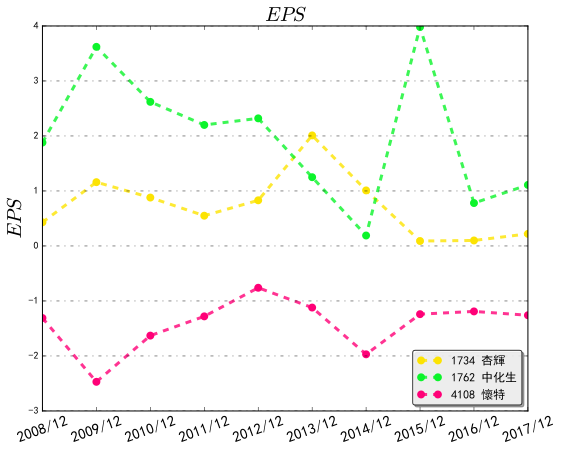

In [17]:
plt.figure(figsize=(8.7,6.9),dpi=100)
COLORS = ["#FCE302", "#0CF42B", "#FF0077", "#2FB6F9", "#FF07F6"]
for i in range(3):
    plt.plot( np.arange(10), EPS[0+10*i:10+10*i], color = COLORS[i], label=Company[i], lw=3, ls= '--',
             marker ="o", mew = 2, mec = COLORS[i], alpha=0.8)

plt.title("$EPS$", color= 'k', fontsize= 20)
plt.ylabel("$EPS$", color= 'k', fontsize = 20)    
#新增x軸標籤,旋轉45度可以避免卡在一起
plt.xticks(np.arange(10), Timelist, color ='k', fontsize= 15, rotation = 20)
#圖例
leg= plt.legend(loc='lower right', ncol=1, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.8)

plt.grid(axis='y', ls= '-.', color='k')
plt.savefig(image_path + '\EPS.svg')
plt.show()

### Traditional style EPS

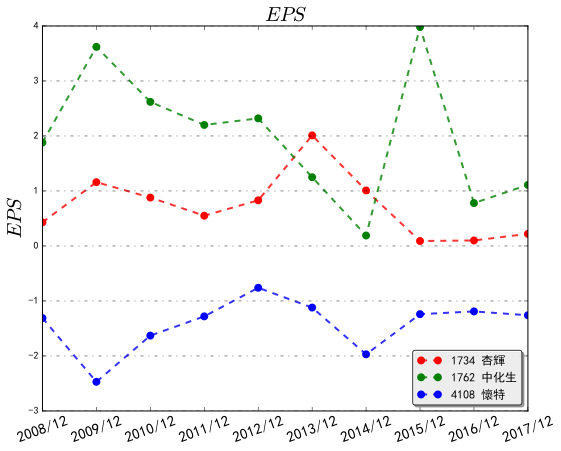

In [18]:
plt.figure(figsize=(8.7,6.9),dpi=100)
#COLORS = ["#FCE302", "#0CF42B", "#FF0077", "#2FB6F9", "#FF07F6"]
COLORS = ["r", "g", "b", "y"]
for i in range(3):
    plt.plot( np.arange(10), EPS[0+10*i:10+10*i], color = COLORS[i], label=Company[i], lw=2, ls= '--',
             marker ="o", mew = 2, mec = COLORS[i], alpha=0.8)

plt.title("$EPS$", color= 'k', fontsize= 20)
plt.ylabel("$EPS$", color= 'k', fontsize = 20)    
#新增x軸標籤,旋轉45度可以避免卡在一起
plt.xticks(np.arange(10), Timelist, color ='k', fontsize= 15, rotation = 20)
#圖例
leg= plt.legend(loc='lower right', ncol=1, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.8)

plt.grid(axis='y', ls= '-.', color='k')
plt.savefig(image_path + '\EPS_std.svg')
plt.show()

### Income before income tax

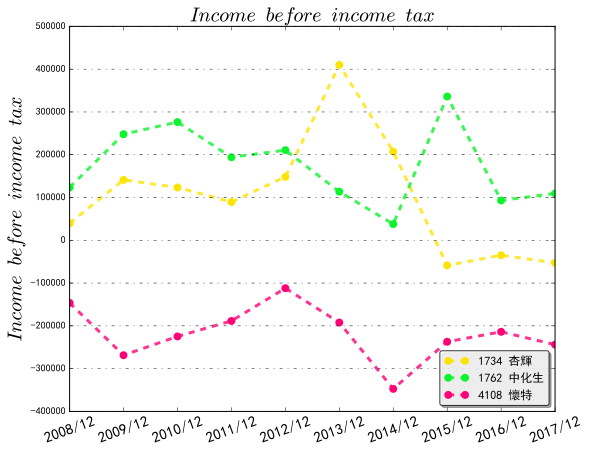

In [19]:
plt.figure(figsize=(8.7,6.9),dpi=100)
COLORS = ["#FCE302", "#0CF42B", "#FF0077", "#2FB6F9", "#FF07F6"]
for i in range(3):
    plt.plot( np.arange(10), Incomebeforeincometax[0+10*i:10+10*i], color = COLORS[i], label=Company[i], lw=3, ls= '--',
             marker ="o", mew = 2, mec = COLORS[i], alpha=0.8)

plt.title("$Income$ $before$ $income$ $tax$", color= 'k', fontsize= 20)
plt.ylabel("$Income$ $before$ $income$ $tax$", color= 'k', fontsize = 20)    
#新增x軸標籤,旋轉45度可以避免卡在一起
plt.xticks(np.arange(10), Timelist, color ='k', fontsize= 15, rotation = 20)
#圖例
leg= plt.legend(loc='lower right', ncol=1, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.8)

plt.grid(axis='y', ls= '-.', color='k')
plt.savefig(image_path + '\Income before income tax.svg')
plt.show()

### Traditional style Income before income tax

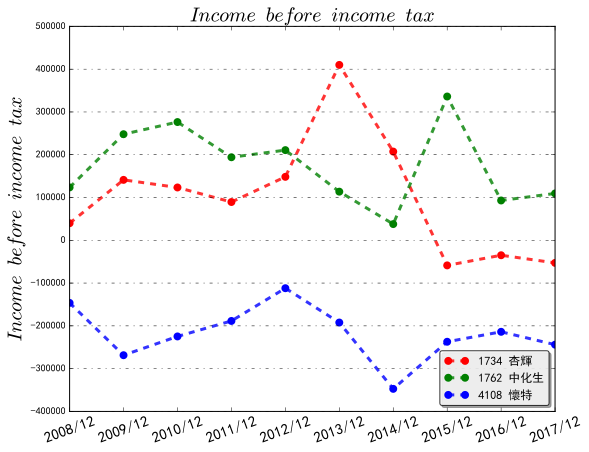

In [20]:
plt.figure(figsize=(8.7,6.9),dpi=100)
#COLORS = ["#FCE302", "#0CF42B", "#FF0077", "#2FB6F9", "#FF07F6"]
COLORS = ["r", "g", "b", "y"]
for i in range(3):
    plt.plot( np.arange(10), Incomebeforeincometax[0+10*i:10+10*i], color = COLORS[i], label=Company[i], lw=3, ls= '--',
             marker ="o", mew = 2, mec = COLORS[i], alpha=0.8)

plt.title("$Income$ $before$ $income$ $tax$", color= 'k', fontsize= 20)
plt.ylabel("$Income$ $before$ $income$ $tax$", color= 'k', fontsize = 20)    
#新增x軸標籤,旋轉45度可以避免卡在一起
plt.xticks(np.arange(10), Timelist, color ='k', fontsize= 15, rotation = 20)
#圖例
leg= plt.legend(loc='lower right', ncol=1, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.8)

plt.grid(axis='y', ls= '-.', color='k')
plt.savefig(image_path + '\Income before income tax_std.svg')
plt.show()